In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Rider-Info.csv')

In [7]:
df.tail()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
449995,2021-02-06 10:03:16,130226,2021-02-06 00:00:00,2021-02-06 10:03:44,2021-02-06 10:04:14,2021-02-06 10:27:29,2021-02-06 10:44:08,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,NaN,NaN,NaN,369.516667,NaN
449996,2021-02-06 10:03:17,130227,2021-02-06 00:00:00,2021-02-06 10:03:18,2021-02-06 10:04:34,2021-02-06 10:22:17,2021-02-06 10:31:43,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,NaN,NaN,NaN,239.133333,NaN
449997,2021-02-06 10:03:18,130228,2021-02-06 00:00:00,2021-02-06 10:04:06,2021-02-06 10:04:39,2021-02-06 10:19:06,2021-02-06 10:26:56,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,NaN,NaN,NaN,204.150000,NaN
449998,2021-02-06 10:03:19,130229,2021-02-06 00:00:00,2021-02-06 10:03:19,2021-02-06 10:05:41,2021-02-06 10:20:39,2021-02-06 10:30:41,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,NaN,NaN,NaN,65.583333,NaN
449999,2021-02-06 10:03:24,130230,2021-02-06 00:00:00,2021-02-06 10:03:45,2021-02-06 10:05:14,2021-02-06 10:13:26,2021-02-06 10:19:41,2078,1.8925,0.09,30.0,30.0,0,0.0,108.0,NaN,NaN,NaN,212.000000,NaN


### 1. Order Completion Rate and Cancellation Insights

In [8]:
total_orders = len(df)
completed_orders = df['delivered_time'].notnull().sum()
cancelled_orders = df['cancelled'].sum()

completion_rate = (completed_orders / total_orders) * 100
cancellation_rate = (cancelled_orders / total_orders) * 100

print(f"Order Completion Rate: {completion_rate:.2f}%")
print(f"Order Cancellation Rate: {cancellation_rate:.2f}%")

Order Completion Rate: 98.84%
Order Cancellation Rate: 1.16%


### Average Delivery Time Analysis

In [9]:
# Convert time columns to datetime if not already
time_columns = ['order_time', 'allot_time', 'accept_time', 'pickup_time', 'delivered_time']
for col in time_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Handle NaT for missing values

# Calculate time intervals for delivered orders only
df_delivered = df[df['delivered_time'].notnull()]
df_delivered['order_to_delivery'] = (df_delivered['delivered_time'] - df_delivered['order_time']).dt.total_seconds() / 60  # in minutes
df_delivered['allot_to_accept'] = (df_delivered['accept_time'] - df_delivered['allot_time']).dt.total_seconds() / 60
df_delivered['accept_to_pickup'] = (df_delivered['pickup_time'] - df_delivered['accept_time']).dt.total_seconds() / 60
df_delivered['pickup_to_delivery'] = (df_delivered['delivered_time'] - df_delivered['pickup_time']).dt.total_seconds() / 60

# Average delivery time and other intervals
avg_order_to_delivery = df_delivered['order_to_delivery'].mean()
avg_allot_to_accept = df_delivered['allot_to_accept'].mean()
avg_accept_to_pickup = df_delivered['accept_to_pickup'].mean()
avg_pickup_to_delivery = df_delivered['pickup_to_delivery'].mean()

print(f"Average Order to Delivery Time: {avg_order_to_delivery:.2f} minutes")
print(f"Average Allot to Accept Time: {avg_allot_to_accept:.2f} minutes")
print(f"Average Accept to Pickup Time: {avg_accept_to_pickup:.2f} minutes")
print(f"Average Pickup to Delivery Time: {avg_pickup_to_delivery:.2f} minutes")

Average Order to Delivery Time: 32.46 minutes
Average Allot to Accept Time: 1.02 minutes
Average Accept to Pickup Time: 14.00 minutes
Average Pickup to Delivery Time: 16.29 minutes


C:\Users\Malayaj\AppData\Local\Temp\ipykernel_14164\3061339343.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered['order_to_delivery'] = (df_delivered['delivered_time'] - df_delivered['order_time']).dt.total_seconds() / 60  # in minutes
C:\Users\Malayaj\AppData\Local\Temp\ipykernel_14164\3061339343.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered['allot_to_accept'] = (df_delivered['accept_time'] - df_delivered['allot_time']).dt.total_seconds() / 60
C:\Users\Malayaj\AppData\Loca

### 3. Rider Performance Analysis

In [12]:
print(df.columns)


Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled',
       'undelivered_orders', 'lifetime_order_count', 'reassignment_method',
       'reassignment_reason', 'reassigned_order', 'session_time',
       'cancelled_time', 'order_to_delivery'],
      dtype='object')


In [15]:
rider_performance = df.groupby('rider_id').agg(
    total_allotted_orders=('alloted_orders', 'sum'),
    delivered_orders=('delivered_orders', 'sum'),
    undelivered_orders=('undelivered_orders', 'sum'),
    avg_delivery_time=('order_to_delivery', 'mean')
).reset_index()

# Adding a delivery rate for each rider
rider_performance['delivery_rate'] = (rider_performance['delivered_orders'] / rider_performance['total_allotted_orders']) * 100
rider_performance.sort_values(by='delivery_rate', ascending=False, inplace=True)

print(rider_performance.head())

       rider_id  total_allotted_orders  delivered_orders  undelivered_orders  \
19536     21566                    1.0               1.0                 0.0   
19535     21565                    1.0               1.0                 0.0   
1             1                  170.0             170.0                 0.0   
2             2                  848.0             848.0                 0.0   
3             4                   28.0              28.0                 0.0   

       avg_delivery_time  delivery_rate  
19536          30.533333          100.0  
19535          37.616667          100.0  
1              28.333333          100.0  
2              26.354762          100.0  
3              34.911111          100.0  


###  4. Impact of Session Time on Delivery Performance

Correlation between session time and delivered orders: 0.1698192069355776


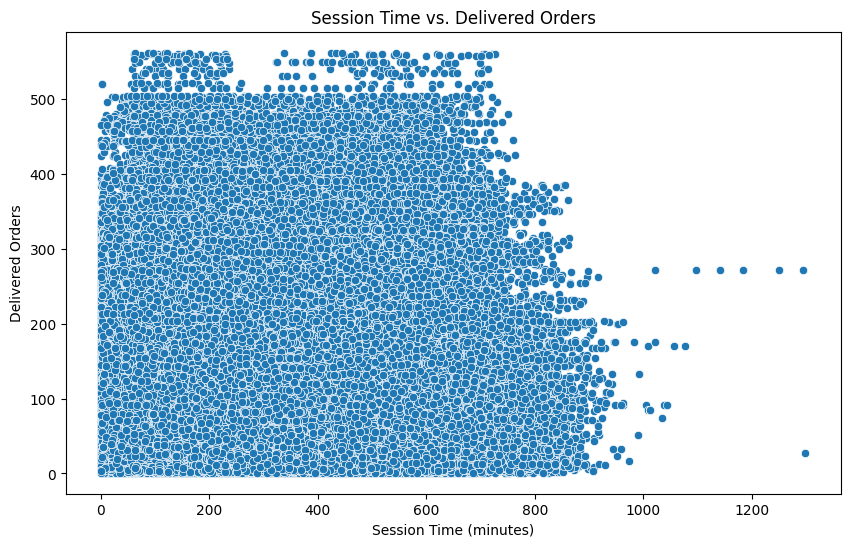

In [16]:
correlation = df[['session_time', 'delivered_orders']].corr()
print("Correlation between session time and delivered orders:", correlation.iloc[0, 1])

# Plot session time vs. delivery rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='session_time', y='delivered_orders', data=df)
plt.title("Session Time vs. Delivered Orders")
plt.xlabel("Session Time (minutes)")
plt.ylabel("Delivered Orders")
plt.show()

                                 reassignment_reason  count  \
0  Auto Reassignment basis Inaction. coreengine.t...   7212   
1                                           Reassign   1241   
2               Reassignment Request from SE portal.   5300   

   avg_delivery_delay  
0           48.888895  
1           65.326842  
2           43.082046  


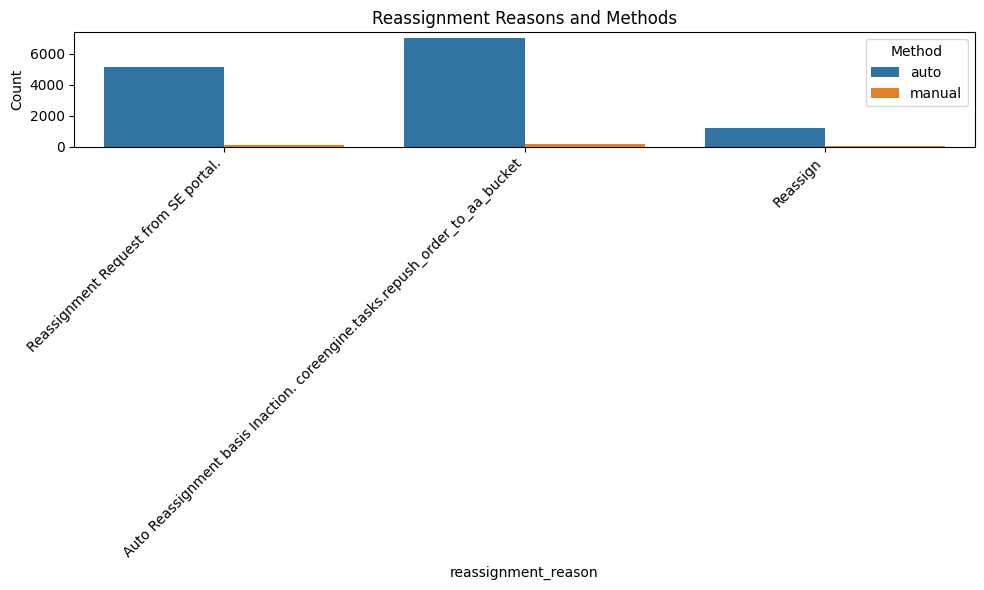

In [29]:
# Reassignment analysis
reassigned_orders = df[df['reassigned_order'] == 1]

# Group by reassignment reason and calculate the average delay in delivery
reassignment_reason_analysis = reassigned_orders.groupby('reassignment_reason').agg(
    count=('order_id', 'count'),
    avg_delivery_delay=('order_to_delivery', 'mean')
).reset_index()

print(reassignment_reason_analysis)

# Plot reassignment counts by reason
plt.figure(figsize=(10, 6))
sns.countplot(data=reassigned_orders, x='reassignment_reason', hue='reassignment_method')
plt.title("Reassignment Reasons and Methods")
# plt.xlabel("Reassignment Reason")
plt.xticks(rotation=45, ha='right')  # Rotate by 45 degrees, align to the right
plt.tight_layout()  # Adjust layout to prevent clipping
plt.ylabel("Count")
plt.legend(title="Method")
plt.show()

### Rider Efficiency Based on Session Time

In [30]:
# Convert time columns to datetime if not already
time_columns = ['order_time', 'delivered_time']
for col in time_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Handle NaT for missing values

In [31]:
# Calculate total delivery time for completed orders
df['order_to_delivery'] = np.where(df['delivered_time'].notnull(),
                                   (df['delivered_time'] - df['order_time']).dt.total_seconds() / 60,
                                   np.nan)  # in minutes

C:\Users\Malayaj\AppData\Local\Temp\ipykernel_14164\1940018241.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_delivered_by_session = df[df['delivered_time'].notnull()].groupby('session_time_category').size().reset_index(name='total_delivered_orders')
C:\Users\Malayaj\AppData\Local\Temp\ipykernel_14164\1940018241.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_delivered_by_session, x='session_time_category', y='total_delivered_orders', palette="Blues_d")


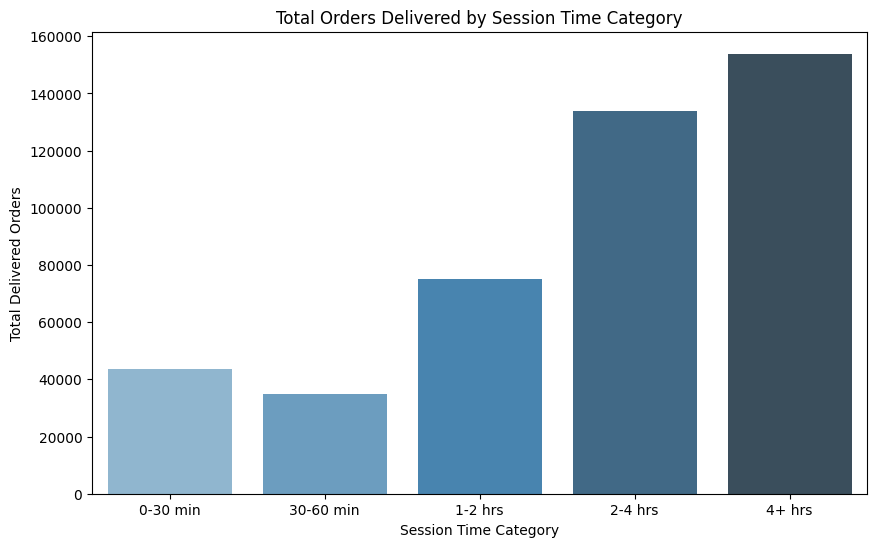

In [32]:
# 1. Orders Delivered by Session Time
# Bin session time into categories to analyze patterns
session_time_bins = [0, 30, 60, 120, 240, np.inf]
session_time_labels = ['0-30 min', '30-60 min', '1-2 hrs', '2-4 hrs', '4+ hrs']
df['session_time_category'] = pd.cut(df['session_time'], bins=session_time_bins, labels=session_time_labels)

# Calculate total orders delivered for each session time category
orders_delivered_by_session = df[df['delivered_time'].notnull()].groupby('session_time_category').size().reset_index(name='total_delivered_orders')

# Plot orders delivered by session time category
plt.figure(figsize=(10, 6))
sns.barplot(data=orders_delivered_by_session, x='session_time_category', y='total_delivered_orders', palette="Blues_d")
plt.title("Total Orders Delivered by Session Time Category")
plt.xlabel("Session Time Category")
plt.ylabel("Total Delivered Orders")
plt.show()


C:\Users\Malayaj\AppData\Local\Temp\ipykernel_14164\678647835.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delivery_time_by_session = df.groupby('session_time_category')['order_to_delivery'].mean().reset_index()
C:\Users\Malayaj\AppData\Local\Temp\ipykernel_14164\678647835.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delivery_time_by_session, x='session_time_category', y='order_to_delivery', palette="Purples_d")


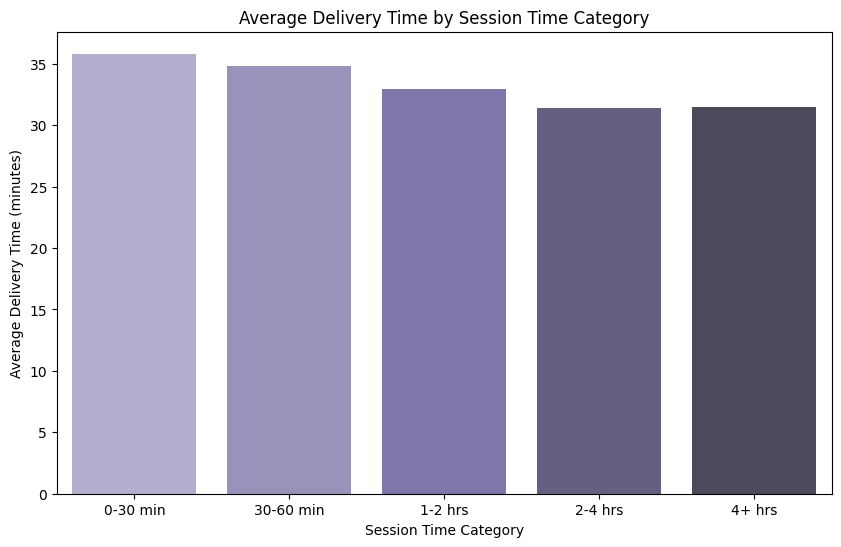

In [33]:
# 2. Average Delivery Time by Session Time
# Calculate average delivery time for each session time category
avg_delivery_time_by_session = df.groupby('session_time_category')['order_to_delivery'].mean().reset_index()

# Plot average delivery time by session time category
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_delivery_time_by_session, x='session_time_category', y='order_to_delivery', palette="Purples_d")
plt.title("Average Delivery Time by Session Time Category")
plt.xlabel("Session Time Category")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

### Here it ends